<a href="https://colab.research.google.com/github/Sanarazaaa/Simulating-Nutrient-Loading-in-Streams/blob/main/Simulating_Nutrient_Loading_in_Streams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

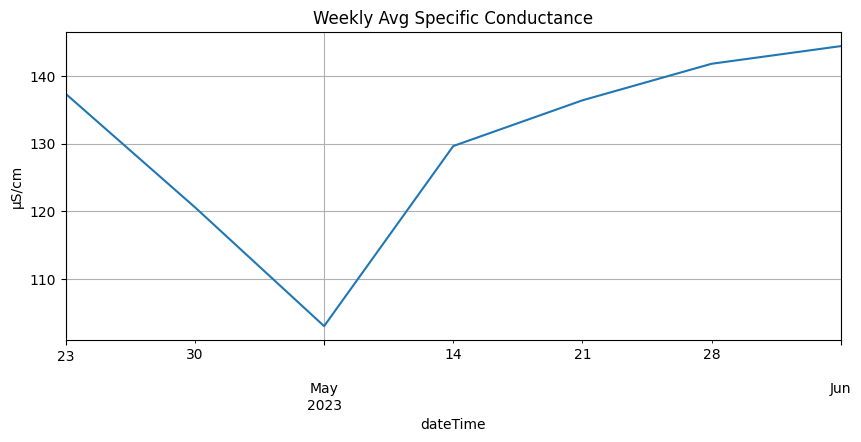

In [16]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

site = "01491000"
parameter = "00095"
start_date = "2023-01-01"
end_date = "2023-06-01"

url = (
    f"https://waterservices.usgs.gov/nwis/iv/?format=json&sites={site}"
    f"&parameterCd={parameter}&startDT={start_date}&endDT={end_date}"
    "&siteStatus=all"
)

response = requests.get(url).json()

if "value" in response and response["value"]["timeSeries"]:
    values = response["value"]["timeSeries"][0]["values"][0]["value"]
    df = pd.DataFrame(values)
    df["dateTime"] = pd.to_datetime(df["dateTime"])
    df["value"] = pd.to_numeric(df["value"], errors='coerce')
    df.set_index("dateTime", inplace=True)

    df['value'].resample("W").mean().plot(figsize=(10, 4), title="Weekly Avg Specific Conductance")
    plt.ylabel("µS/cm")
    plt.grid(True)
    plt.show()
else:
    print("No data available for this site/parameter/date range.")